# Домашнее задание №1

### **Dataset of depressive posts in Russian language collected from social media** [(paper)](https://www.sciencedirect.com/science/article/pii/S2352340920300895)

Скачать датасет в формате .tsv можно [здесь](https://yadi.sk/d/G5rq-R3AK8SOuw).


В качестве задания предлагается:
1. Использовать ```pandas``` и ряд инструментов для автоматической обработки текстов на русском языке, чтобы ответить на вопросы.
2. Написать функции для извлечения текстовых признаков.

Не рекомендуется использовать ```nltk``` для сегментации/токенизации текстов, поскольку существуют инструменты, которые выполняют свою задачу для русского значительно лучше – их мы обсуждали с вами на занятии.


**Дедлайн**: 23 сентября 23:59

In [2]:
import pandas as pd


df = pd.read_csv("depression_data.tsv", sep="\t")
df.head()

,text,label,age
0,"Когда-то я был добрым романтиком, который стре...",1,32.0
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28.0
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16.0
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32.0
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14.0


### Часть 1: Простая статистика (2 балла)

Зачастую в данных, с которыми вы работаете, может быть много неприятных для обработки вещей. Например, мы видим, что в колонке ```age``` очень грязные значения.

In [21]:
df['age'] = df['age'].fillna(0)

df['age'] = df['age'].astype(int)

df['age'].value_counts()

0             39725
16             1823
17             1811
18             1661
15             1582
20             1543
19             1402
21             1273
14             1228
22             1154
23             1120
25             1011
24              917
26              760
27              700
13              673
28              608
30              577
29              479
12              353
32              338
31              311
33              274
35              269
34              243
40              213
38              212
36              208
37              182
39              144
              ...  
1017              1
154               1
666               1
1018              1
155               1
200               1
211260            1
92                1
14715             1
125               1
830               1
1214              1
2324              1
116               1
275               1
1230011997        1
241127            1
111               1
159               1


1. Найдите среднее значение возраста в диапазоне от 14 до 50 лет включительно.

In [23]:
# your code and output here

df["age"][(df["age"] >= 14.0) & (df["age"] <= 50.0)].mean()

22.704171601526518

2. Какую долю 16-летние авторы составляют в диапазоне от 16 до 26 лет включительно?

In [24]:
# your code and output here

len(
    df["age"][df["age"] == 16.0])/len(
        df["age"][(df["age"] >= 16.0) & (df["age"] <= 26.0)]
    )

0.1259412780656304

3. Сколько в датасете текстов, авторам которых 28 или 30 лет?

In [25]:
# your code and output here

len(
   df["age"][(df["age"] == 28.0) | (df["age"] == 30.0)]
    )

1185

4. С помощью одной встроенной в ```pandas``` функции отобразите всю статистику по колонке ```age``` в диапазоне от 18 до 30 лет включительно.

In [26]:
# your code and output here

df["age"][(df["age"] >= 18.0) & (df["age"] <= 30.0)].describe()

count    13205.000000
mean        22.676638
std          3.550254
min         18.000000
25%         20.000000
50%         22.000000
75%         25.000000
max         30.000000
Name: age, dtype: float64

5. Сколько в датасете положительных / отрицательных примеров?

In [27]:
# your code and output here

df["label"].value_counts()

0    32021
1    32018
Name: label, dtype: int64

### Часть 2: Предобработка (3 балла)

In [9]:
!python -m pip install --upgrade --quiet seaborn
!python -m pip install --quiet razdel pymorphy2[fast]

You should consider upgrading via the '/Users/macbook/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/macbook/anaconda3/bin/python -m pip install --upgrade pip' command.


1. Посчитайте количество предложений в каждом тексте. Сохраните эти значения в отдельной колонке датафрейма.

In [10]:
from razdel import sentenize, tokenize

In [11]:
# your code and output here

all_sents = []
texts = df.text.tolist()

for text in texts:
    len_text = list(sentenize(text))
    all_sents.append(len(len_text))

df['length'] = all_sents

2. Напишите функцию для токенизации текста. Удалите стоп-слова.

In [15]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords

In [17]:
# your code and output here

def get_tokens(text):
    """
    здесь можно еще и знаки пунктуации убрать, но это скорее будет зависеть от того,
    что мы хотим считать токенами: на всякий случай я сделала это отдельно
    """
    tokenized_text = tokenize(text)
    tokens = list(tokenized_text)
    text_token = [_.text for _ in tokens]
    text_end = ' '.join(
            [wrd.lower() for wrd in text_token if wrd.lower() not in stopwords.words(
                "russian")])
    text_end_2 = ' '.join(w for w in text_token)
    return text_end, text_end_2

In [18]:
from tqdm.auto import tqdm

In [19]:
tokenizing_texts = []  # без стоп-слова
tokenizing_texts_st = []  # со стоп-словами
for text in tqdm(df['text']):
    with_st_w, without_st_w = get_tokens(text)
    tokenizing_texts.append(with_st_w)
    tokenizing_texts_st.append(without_st_w)

In [20]:
df["text_in_tokens"] = tokenizing_texts
df["text_in_tokens_no_sw"] = tokenizing_texts_st

3. Посчитайте количество токенов в тексте (без стоп-слов). Найдите среднее этих значений как по всей выборке, так и внутри каждого класса. 

In [29]:
def del_punct(text):
    """
    убираем пунктуацию для подсчета токенов без стоп-слов
    """
    line = "".join(l for l in text if l not in (
            '.', ',', '[', ']', '', '«', '»',
            '/', '#',  '_', '%', '@', '^', '&', '*',
            '?', '!', ':', ';', '—', '--', '<', '>', '"', '(', ')'))
    return line

In [30]:
tokenizing_texts_2 = []
for text in tqdm(df['text_in_tokens']):
    tokenizing_texts_2.append(del_punct(text))

In [31]:
df["tokens_no_punct"] = tokenizing_texts_2

In [152]:
# your code and output here

num_rokens = [len(text.split()) for text in df["tokens_no_punct"]]
df['count_tokens'] = num_rokens

In [153]:
print('Среднее знанение по всей выборке: ', df['count_tokens'].mean())
print('Cреднее по классу 0: ', df[df['label'] == 0]['count_tokens'].mean())
print('Cреднее по классу 1: ', df[df['label'] == 1]['count_tokens'].mean())

Среднее знанение по всей выборке:  111.34461812333109
Cреднее по классу 0:  151.34190062771307
Cреднее по классу 1:  71.34358798176027


Тексты класса 1 в 2 раза короче текстов в классе 0

4. Напишите функцию, которая переводит текст в последовательность лемм.

In [34]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

In [35]:
# your code and output here

def get_lemmas(text):
    """
    здесь можно брать токенизированные тексты без стоп-слов,
    но по заданию не очень понятно, нужно брать 
    """
    new_l = ''
    for word in text.split():
        wrd = morph.parse(word)[0]
        new_l += wrd.normal_form + ' '
    return new_l

In [36]:
lemmatized_texts = []
for text in tqdm(df["text_in_tokens_no_sw"]):
    lemmatized_texts.append(get_lemmas(del_punct(text)))

In [37]:
df["lemmatized_text"] = lemmatized_texts

5. Напишите функцию, которая переводит текст в последовательность частеречных тегов.

In [38]:
# your code and output here

def pos_tags(text):
    new_l = ''
    for word in text.split():
        wrd = morph.parse(word)[0]
        tag = wrd.tag.POS
        if not tag:
            new_l += '-' + ' '
        else:
            new_l += tag + ' '
    return new_l

In [39]:
pos_texts = []
for text in tqdm(df["text_in_tokens_no_sw"]):
    pos_texts.append(pos_tags(del_punct(text)))

In [40]:
df["pos_tags"] = pos_texts

In [154]:
df.head()

,text,label,age,length,text_in_tokens,text_in_tokens_no_sw,tokens_no_punct,lemmatized_text,pos_tags,lemmatized_text_no_sw,count_tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32,15.0,"когда-то добрым романтиком , который стремился...","Когда-то я был добрым романтиком , который стр...",когда-то добрым романтиком который стремился ...,когда-то я быть добрый романтик который стреми...,ADVB NPRO VERB ADJF NOUN ADJF VERB INFN ADJF N...,когда-то добрый романтик который стремиться по...,161
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28,6.0,здраствуйте ! каждый день просыпаюсь мыслью жи...,Здраствуйте ! Я каждый день просыпаюсь с мысль...,здраствуйте каждый день просыпаюсь мыслью жив...,здраствовать я каждый день просыпаться с мысль...,VERB NPRO ADJF NOUN VERB PREP NOUN ADVB NPRO V...,здраствовать каждый день просыпаться мысль жит...,64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16,10.0,проблемы девушкой . каждую ссору могу перенест...,У меня проблемы с девушкой . Каждую ссору я не...,проблемы девушкой каждую ссору могу перенести...,у я проблема с девушка каждый ссора я не мочь ...,PREP NPRO NOUN PREP NOUN ADJF NOUN NPRO PRCL V...,проблема девушка каждый ссора мочь перенести о...,43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32,5.0,"вся жизнь это сплошной ад , котором горю посто...","Вся моя жизнь это один сплошной ад , в котором...",вся жизнь это сплошной ад котором горю постоя...,весь мой жизнь это один сплошной ада в который...,ADJF ADJF NOUN PRCL ADJF ADJF NOUN PREP ADJF N...,весь жизнь это сплошной ада который горе посто...,25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14,18.0,хочу уснуть проснуться . каждый день одно . ка...,Я хочу уснуть и не проснуться . каждый день од...,хочу уснуть проснуться каждый день одно како...,я хотеть уснуть и не проснуться каждый день од...,NPRO VERB INFN CONJ PRCL INFN ADJF NOUN ADJF C...,хотеть уснуть проснуться каждый день один како...,199


6. Какие слова мы можем добавить в список стоп-слов? Приведите примеры и объясните, почему.

In [42]:
# your code and output here
print(stopwords.words("russian"))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

Можно отнести к стоп-словам такие, которые не несут никакого смысла: пм, жо, отс (то, что обычно используют, когда пишут посты, например)  + разные сокращения типа "тг"

Междометия: ох, ах

Детерминативы: поссесивы типа "твой" (по аналогии с уже входящим "мой")

Имена собственные: Андрей, Питер и т.д. (но тут нужно быть очень аккуратным)

Так как все это не несет смысловой нагрузки для дальнейшей классификации

Необнозначный пункт: так как это тексты, в которых есть всякие лишние данные типа смайликов, вероятно, они - то, что можно будет также считать стоп-словами (они, вероятно, могут создавать шум при препроцессинге, поэтому стоит их удалить, чтобы данные были максимально чистыми). В качестве примера - любой смайлик. Но тут нужно быть осоторожным, так как в некоторых случаях смайлики наоборот нужно учитывать, однако - как вариант, можно попробовать отнести их к стоп-словам. Для некоторых задач смайлики наоборот несут много смысловой нагрузки, поэтому этот пункт мне кажется неоднозначным: например, аргумент против этого - можем предположить, что грустные смайлики -> депрессивный текст.

### Часть 3: Визуализация (1 балл)

1. Визуализируйте распределение количество предложений / текст.

----

тут будет много графиков

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from collections import Counter


style.use('seaborn')

In [155]:
df['length'] = df['length'].fillna(0)

df['length'] = df['length'].astype(int)

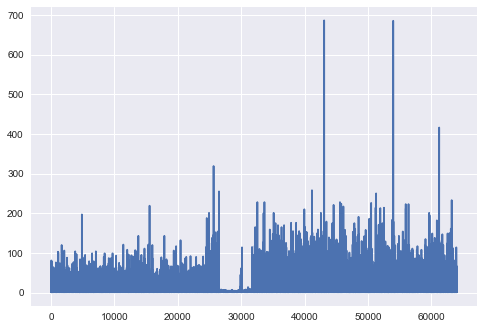

In [156]:
# распределения по датасету для наглядности

df['length'].plot()

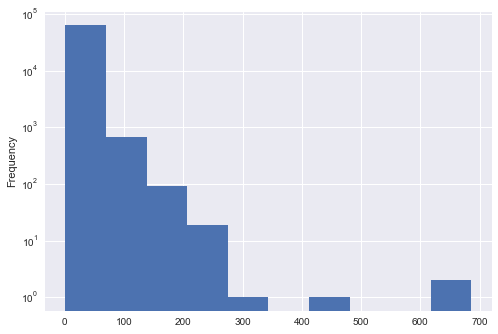

In [171]:
# не очень красивая гистограмма по длине предложений

df['length'].plot.hist(logy=True)

/Users/macbook/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


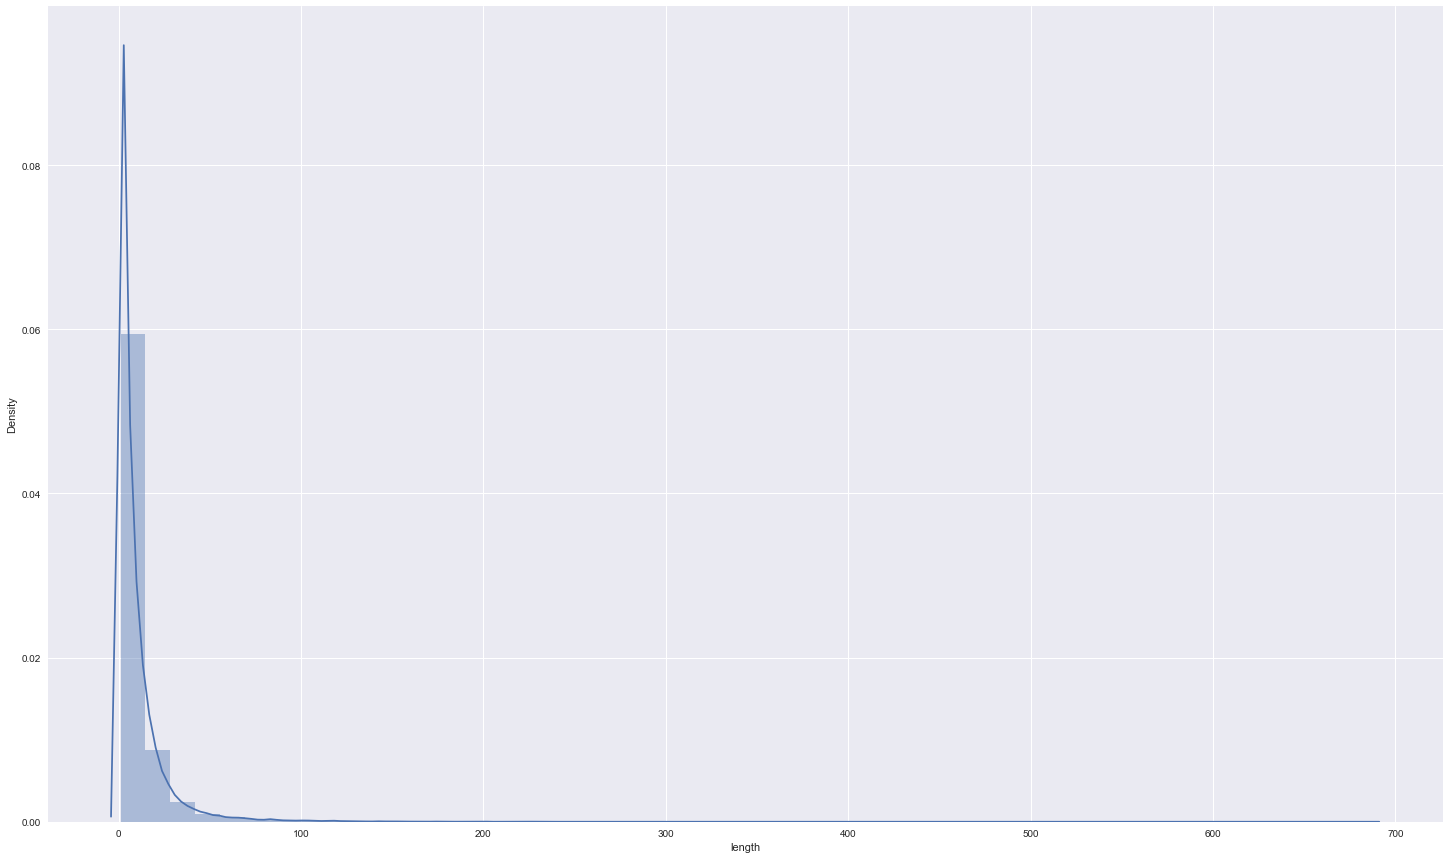

In [157]:
# итоговая функция: количество предложений / текст

fig = plt.subplots(figsize=(25, 15))
sns_plot = sns.distplot(df['length'])
fig = sns_plot.get_figure()

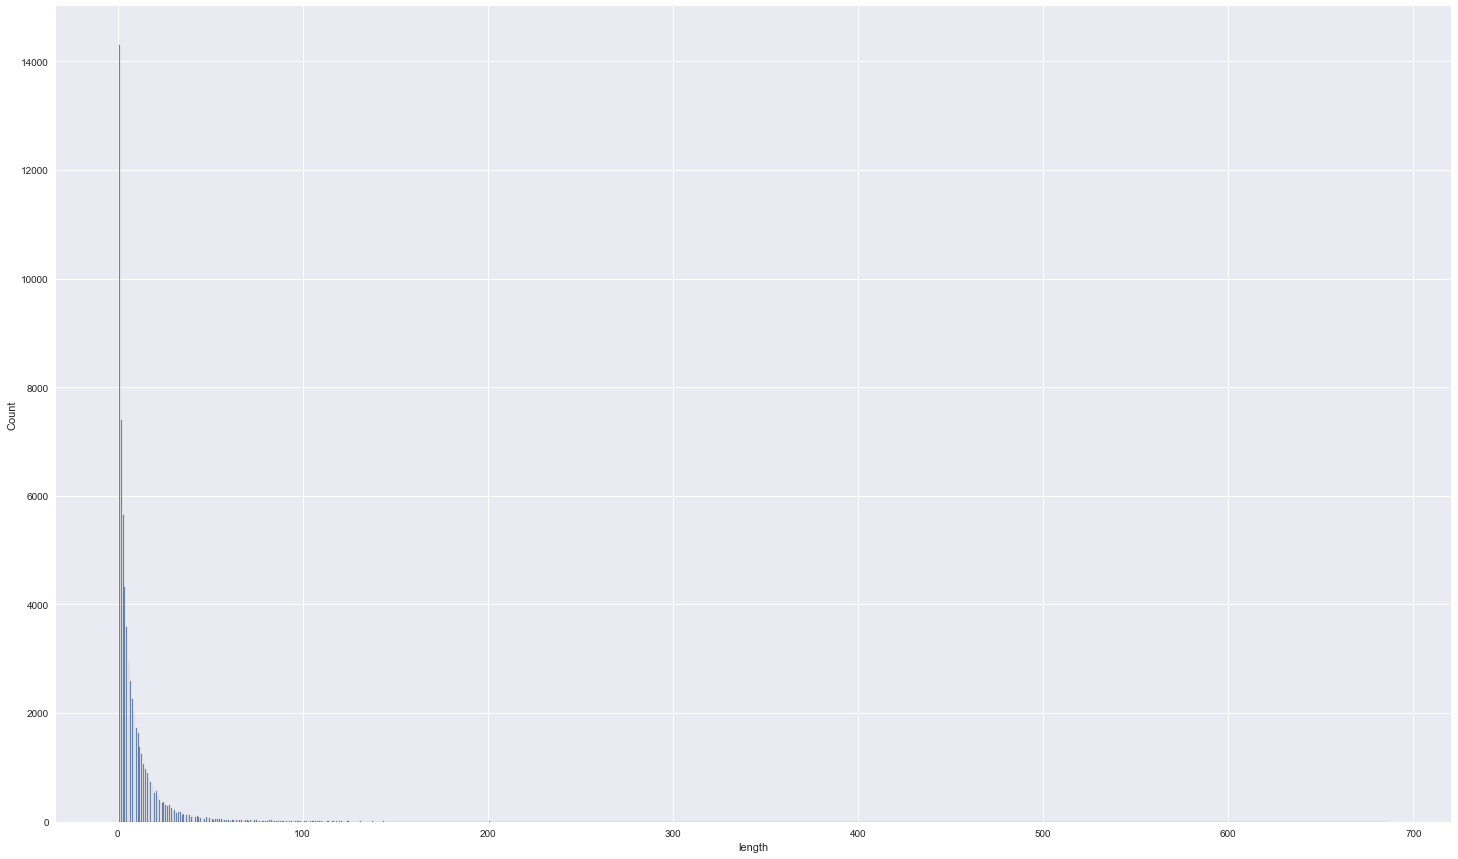

In [158]:
# функция с количественным распределением

fig = plt.subplots(figsize=(25, 15))
sns_plot = sns.histplot(df['length'])
fig = sns_plot.get_figure()

2. Визуализируйте распределение количество-предложений / текст внутри каждого класса.

In [164]:
# your code and output here

def plot_len_dist(df, name):
    fig, axs = plt.subplots(1, 3, figsize=(25, 10))
    for i, data in enumerate(df):
        sns.distplot(data['length'], bins=20, color='red', ax=axs[i])
        axs[i].axvline((data['length']).mean(), 
                   color='k', 
                   linestyle='dashed', 
                   linewidth=1, 
                   label='среднее значение')
        axs[i].legend()
    axs[0].set(title="sent_len distribution in {} class 0".format(name))
    axs[1].set(title="sent_len distribution in {} class 1".format(name))
    axs[2].set(title="sent_len distribution in {} all dataset".format(name))
    plt.show()
    fig.tight_layout()

/Users/macbook/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/macbook/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

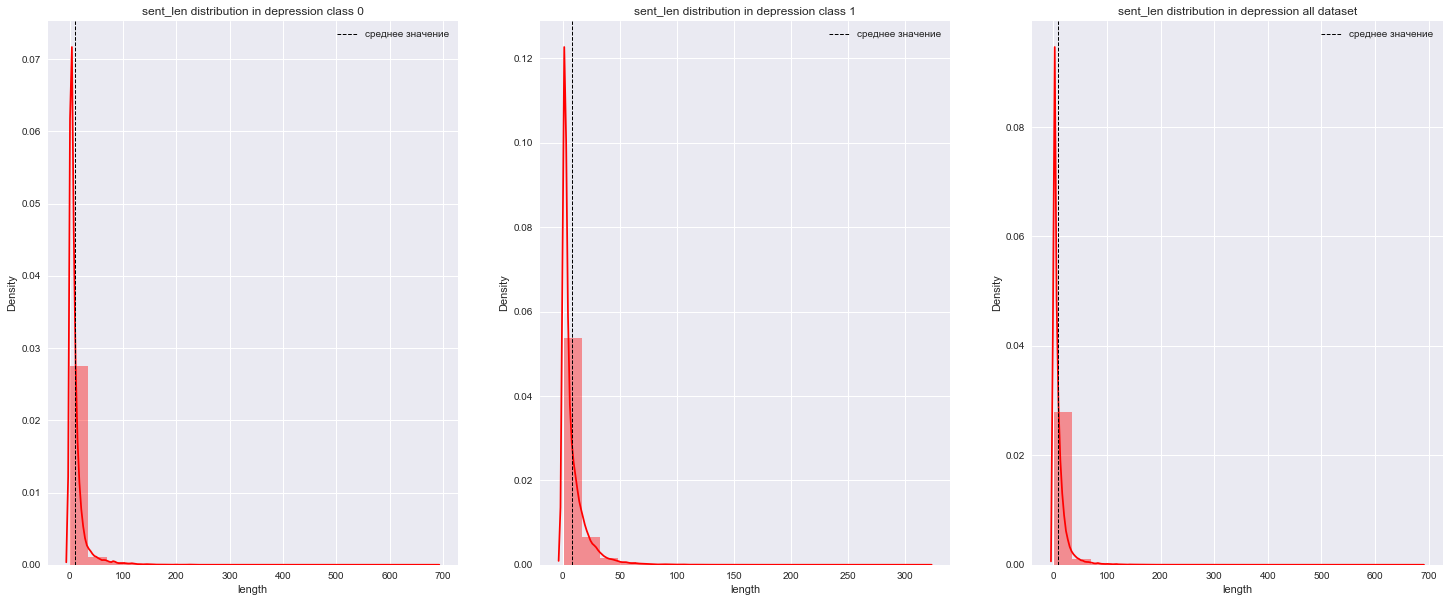

In [165]:
plot_len_dist((df[df['label'] == 0], df[df['label'] == 1], df), 'depression')

3. Верно ли, что количество предложений в тексте коррелирует с возрастом автора в подвыборке от 16 до 32 лет включительно? Если да, какая это корреляция – положительная или отрицательная? Визуализируйте матрицу корреляции.

In [123]:
# your code and output here
import numpy as np


data = df[(df["age"] >= 16) & (df["age"] <= 32)]

In [124]:
data = data[['age', 'length']]

In [126]:
corr = data.corr()

In [127]:
corr

,age,length
age,1.000000,0.039831
length,0.039831,1.000000


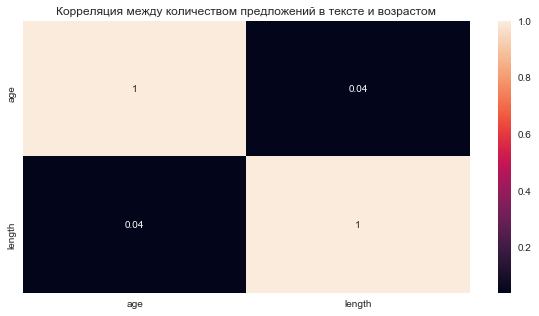

In [128]:
# корреляции нет, так как значения 0.04 --> близки к нулю


fig, ax = plt.subplots(figsize=(10, 5))

sns.heatmap(
    data=data.corr(), 
    annot=True,
    ax=ax
)

plt.title(
    "Корреляция между количеством предложений в тексте и возрастом")
plt.show()

### Часть 4: Извлечение текстовых признаков (4 балла)

1. Самостоятельно реализуйте функцию для получения посимвольных н-грамм (без использования библиотек).

In [53]:
# your code and output here

def char_ngrams(sentence, n):
    grams = []
    sent = sentence
    
    for i in range(len(sent)):
        new = [sent[i:i+n]]
        for el in new:
            if len(el) == n:
                 grams.append(el)

    return grams

text = "уставшая мама мыла грязную раму"
char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

In [492]:
# пример работы функции

text = "уставшая мама мыла грязную раму"

char_ngrams(text, n=3)[:10]

['уст', 'ста', 'тав', 'авш', 'вша', 'шая', 'ая ', 'я м', ' ма', 'мам']

2. Самостоятельно реализуйте функцию для получения пословных н-грамм (без использования библиотек).

In [54]:
# your code and output here

def word_ngrams(sentence, n):
    grams = []
    sent = sentence.split()
    for i in range(n):
        new = [sent[i:i+n]]
        for el in new:
            if len(el) == n:
                 grams.append(el)

    return grams

text = "уставшая мама мыла грязную раму"
word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [55]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

In [ ]:
# пример работы функции

word_ngrams(text, n=3)

[['уставшая', 'мама', 'мыла'],
 ['мама', 'мыла', 'грязную'],
 ['мыла', 'грязную', 'раму']]

In [ ]:
word_ngrams(text, n=4)

[['уставшая', 'мама', 'мыла', 'грязную'], ['мама', 'мыла', 'грязную', 'раму']]

3. Самостоятельно реализуйте функцию для получения н-грамм лемм (без использования библиотек).

In [56]:
# your code and output here

def lemma_ngrams(text, n):
    new_text = get_lemmas(text)
    final = word_ngrams(new_text, n)
    return final
    
lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [57]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'], ['мама', 'мыло', 'грязный', 'рам']]

In [ ]:
# пример работы функции

lemma_ngrams(text, n=3)

[['устать', 'мама', 'мыло'],
 ['мама', 'мыло', 'грязный'],
 ['мыло', 'грязный', 'рам']]

In [ ]:
lemma_ngrams(text, n=4)

[['устать', 'мама', 'мыло', 'грязный'],
 ['мама', 'мыло', 'грязный', 'рам']]

4. Самостоятельно реализуйте функцию для получения н-грамм частеречных тегов (без использования библиотек).

In [58]:
# your code and output here

def pos_ngrams(text, n):
    new_text = pos_tags(text)
    final = word_ngrams(new_text, n)
    return final
    
pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [59]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

In [ ]:
# пример работы функции

pos_ngrams(text, n=3)

[['PRTF', 'NOUN', 'NOUN'], ['NOUN', 'NOUN', 'ADJF'], ['NOUN', 'ADJF', 'NOUN']]

In [ ]:
pos_ngrams(text, n=4)

[['PRTF', 'NOUN', 'NOUN', 'ADJF'], ['NOUN', 'NOUN', 'ADJF', 'NOUN']]

5. Самостоятельно реализуйте функцию для получения частотного словаря частеречных тегов по коллекции документов.

In [112]:
# your code and output here

def build_pos_dict(corpus):
    dct = {}
    for st in tqdm(corpus):
        for w in st.split():
            wrd = morph.parse(w)[0]
            tag = wrd.tag.POS
            new_tag = ''
            if not tag:
                new_tag = '-'
            else:
                new_tag = tag
            if new_tag not in dct:
                dct[new_tag] = 1
            else:
                dct[new_tag] += 1
    return dct


corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]


build_pos_dict(corpus)

{'NOUN': 7, 'PRTF': 1, 'ADJF': 2, 'VERB': 1}

In [113]:
build_pos_dict(df['tokens_no_punct'])

{'ADVB': 272435,
 'ADJF': 1076376,
 'NOUN': 3232956,
 'VERB': 905858,
 'INFN': 264321,
 'CONJ': 52801,
 'PRCL': 83438,
 '-': 888165,
 'NPRO': 59623,
 'GRND': 21503,
 'ADJS': 67705,
 'COMP': 21670,
 'PREP': 35851,
 'PRED': 12441,
 'INTJ': 6395,
 'PRTF': 59592,
 'PRTS': 50101,
 'NUMR': 19167}

In [ ]:
# пример работы функции

corpus = [
    "мама мыла уставшую раму",
    "высшая школа экономики",
    "компьютерная лингвистика",
    "осень наступила"
]

build_pos_dict(corpus)

{'ADJF': 2, 'NOUN': 7, 'PRTF': 1, 'VERB': 1}

6. Постройте частотный словарь лемм по текстам внутри каждого класса. Найдите топ-15 лемм для текстов каждого класса. Есть ли между этими списками пересечение? Если да, сколько лемм пересекается?

In [61]:
lemmatized_texts_no_sw = []

for text in tqdm(df["tokens_no_punct"]):
    lemmatized_texts_no_sw.append(get_lemmas(del_punct(text)))

In [62]:
df["lemmatized_text_no_sw"] = lemmatized_texts_no_sw

In [163]:
df.head()

,text,label,age,length,text_in_tokens,text_in_tokens_no_sw,tokens_no_punct,lemmatized_text,pos_tags,lemmatized_text_no_sw,count_tokens
0,"Когда-то я был добрым романтиком, который стре...",1,32,15,"когда-то добрым романтиком , который стремился...","Когда-то я был добрым романтиком , который стр...",когда-то добрым романтиком который стремился ...,когда-то я быть добрый романтик который стреми...,ADVB NPRO VERB ADJF NOUN ADJF VERB INFN ADJF N...,когда-то добрый романтик который стремиться по...,161
1,Здраствуйте! Я каждый день просыпаюсь с мыслью...,1,28,6,здраствуйте ! каждый день просыпаюсь мыслью жи...,Здраствуйте ! Я каждый день просыпаюсь с мысль...,здраствуйте каждый день просыпаюсь мыслью жив...,здраствовать я каждый день просыпаться с мысль...,VERB NPRO ADJF NOUN VERB PREP NOUN ADVB NPRO V...,здраствовать каждый день просыпаться мысль жит...,64
2,У меня проблемы с девушкой. Каждую ссору я не ...,1,16,10,проблемы девушкой . каждую ссору могу перенест...,У меня проблемы с девушкой . Каждую ссору я не...,проблемы девушкой каждую ссору могу перенести...,у я проблема с девушка каждый ссора я не мочь ...,PREP NPRO NOUN PREP NOUN ADJF NOUN NPRO PRCL V...,проблема девушка каждый ссора мочь перенести о...,43
3,"Вся моя жизнь это один сплошной ад, в котором ...",1,32,5,"вся жизнь это сплошной ад , котором горю посто...","Вся моя жизнь это один сплошной ад , в котором...",вся жизнь это сплошной ад котором горю постоя...,весь мой жизнь это один сплошной ада в который...,ADJF ADJF NOUN PRCL ADJF ADJF NOUN PREP ADJF N...,весь жизнь это сплошной ада который горе посто...,25
4,Я хочу уснуть и не проснуться.каждый день одно...,1,14,18,хочу уснуть проснуться . каждый день одно . ка...,Я хочу уснуть и не проснуться . каждый день од...,хочу уснуть проснуться каждый день одно како...,я хотеть уснуть и не проснуться каждый день од...,NPRO VERB INFN CONJ PRCL INFN ADJF NOUN ADJF C...,хотеть уснуть проснуться каждый день один како...,199


In [64]:
# your code and output here

class_1 = df.lemmatized_text_no_sw[df.label == 1].tolist()
class_0 = df.lemmatized_text_no_sw[df.label == 0].tolist()

In [136]:
import re

def dict_class(class_n):
    dct = {}
    for st in class_n:
        for w in st.split():
            w = w.replace('–', '')
            if w != '': 
                if w not in dct:
                    dct[w] = 1
                else:
                    dct[w] += 1
    del dct['-']
    return dct, sorted(dct.items(), key=lambda x: -x[1])

In [137]:
class_1_dict, class_1_dl  = dict_class(class_1)
class_0_dict, class_0_dl = dict_class(class_0)

In [138]:
top_1 = [i[0] for i in class_1_dl[:15]]
top_0 = [i[0] for i in class_0_dl[:15]]

In [139]:
top_1

['это',
 'год',
 'жить',
 'хотеть',
 'жизнь',
 'мочь',
 'человек',
 'весь',
 'очень',
 'мой',
 'просто',
 'знать',
 'который',
 'свой',
 'друг']

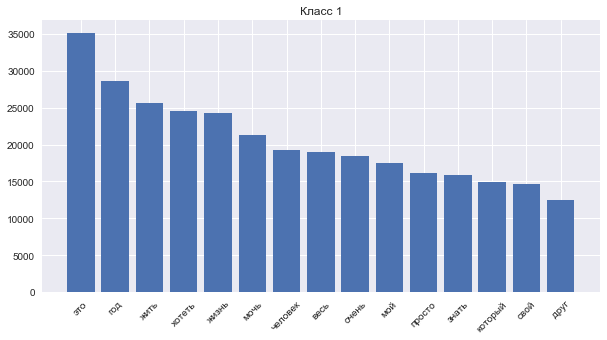

In [140]:
plt.figure(figsize=(10,5))
plt.bar(range(15), [i[1] for i in class_1_dl[:15]])
plt.xticks(range(15), [i[0] for i in class_1_dl[:15]], rotation=45)
plt.title('Класс 1');

In [141]:
top_0

['год',
 'который',
 'один',
 'это',
 'наш',
 'проект',
 'https',
 'свой',
 'город',
 'работа',
 'день',
 'апрель',
 'также',
 'россия',
 'область']

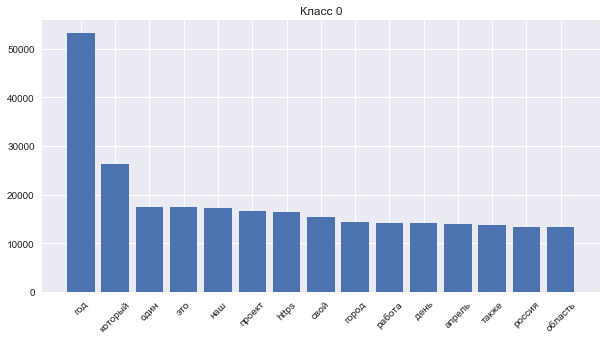

In [142]:
plt.figure(figsize=(10,5))
plt.bar(range(15), [i[1] for i in class_0_dl[:15]])
plt.xticks(range(15), top_0, rotation=45)
plt.title('Класс 0');

In [73]:
# Пересечения для всех словарей

keys_1 = set(class_1_dict.keys())
keys_0 = set(class_0_dict.keys())

intersection = keys_1 & keys_0

In [144]:
intersection

{'окупаться',
 'долговечный',
 'молельный',
 'mass',
 'выборка',
 'нужда',
 'истый',
 'свихнуться',
 'самообслуживание',
 'повышаться',
 'павловка',
 'победитель',
 'овация',
 'занавес',
 'цементный',
 'рыбка',
 'древнегреческий',
 'свечка',
 'неизбывный',
 '11-классник',
 'охать',
 'низкочастотный',
 'грусть',
 'мдп',
 'полезный',
 'малоэффективный',
 '154',
 'улыбка',
 'название',
 'иной',
 'приносить',
 'fashion',
 'ликвидировать',
 'hollywood',
 'грн',
 'загружать',
 'бессознательный',
 'входящий',
 'спичечный',
 'стилистика',
 'поминальный',
 'равномерно',
 'утопать',
 'согреться',
 'socialmedia',
 '7-00',
 'калланетик',
 'морепродукт',
 'терри',
 'расплачиваться',
 'приобретаться',
 'ален',
 'считаный',
 'спортивно',
 'canal',
 'стабильность',
 'сшить',
 'yi',
 'обналичивание',
 'метла',
 'брокер',
 'липа',
 'ic',
 'действовать',
 'маска',
 'расслабиться',
 'контингент',
 'nf',
 'изменчивый',
 'свалка',
 'шахматный',
 'мультсериал',
 'категорически',
 'носов',
 'невыход',
 'тишка

In [75]:
c = list(set(top_1) & set(top_0))

In [76]:
c

['это', 'который', 'свой', 'год']

In [78]:
print('Количество пересечений в топ-15: ', len(c))

Количество пересечений в топ-15:  4


7. Какие текстовые признаки могли бы быть полезными для решения задачи классификации на этих данных? Приведите примеры и перечислите ресурсы, которые вы бы использовали для конструирования этих признаков.

In [170]:
df.text[df.label == 1].head(2).tolist()

['Когда-то я был добрым романтиком, который стремился помочь всем, кто попросит. Мне никогда не было себя жалко, я верил в человечность. Однако все это было фальшем, суррогатная дружба и какие-то непонятные отношения. Девушка, которая клялась, что любит, в итоге изменила да и ушла к другому. Другой так и не появилось - я бесперспективный, а попросту, без достаточного достатка и собственного жилья. Родители с шизофренией (F20.2) Меня никто никогда не поддерживал и не поддерживает. Итак, отдавая кусочек себя каждому, я потерял уже свое душевное тепло, мне стало безразлично, апатия. Бывшая девушка без всяких усилий нашла нового, который на ней сразу же женился и возит ее по разным странам мира. Конечно же, я брался за любую работу, чтобы показать, что не хуже, но меня часто обманывали - недоплачивали или не оплачивали вовсе. Я простой неудачник, который потерял смысл жизни. Мою ситуацию не спасает даже внешность - она ужасная (попросту урод), потому часто завидую тем, кому повезло с внешн

* возможно, для решения задачи классификации здесь могли бы быть полезны разные н-граммы (би-граммы, три-граммы и т.д.) по словам (примером может случить выдача функция, которую нужно было написать вручную выше). Для реализации можно применить tf-idf - тогда мы сможем получить лучшие н-граммы по ranking (вполне возможно, что это может пригодиться для классфикации депрессивных текстов). Можно применить то, что уже реализовано в работе

* тут может помочь набор слов (словарь), имеющих негативную/депрессивную окраску: депрессия, смерть, умереть и т.д. Можно проверить налилчие подобных слов в предложениях и сохрнаить это в отдельную колонку с значениями 0 - нет слова, 1 - есть. Это может показать, является ли текст депрессивным.

* можно посмотреть на смайлики (очень спорный момент), но можно попробовать: предполагаем, что грустные смайлики будут чаще использоваться в депрессивных текстах. Можно взять список грустных смайликов и дополнить, например, такими: ⚰. И по аналогии с предыдущим пунктом проверить наличие в текстах.

* кажется, что можно с помощью tf-idf можно сделать матричное представление текстов (sklearn - TfIdf.Vectoizer()), также можно сделать bag of words (с помощью nltk, например). Это поможет сделать вектор текста в вектор признаков.

То есть нам важны всякие семантические признаки, которые могли бы позволить отличить депрессивный текст от недепрессивного.

